<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [49]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/default.csv'
default = pd.read_csv(file_path)

In [50]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


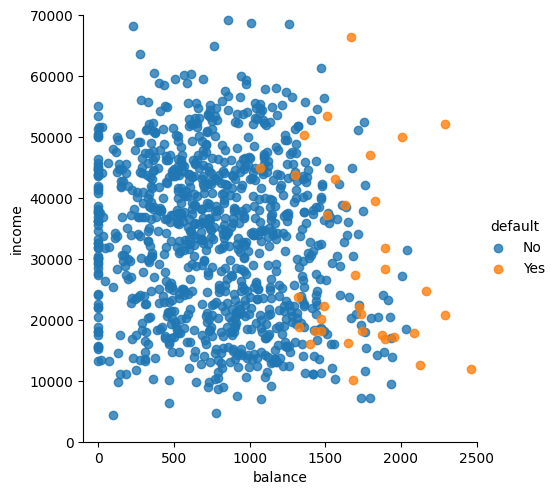

In [51]:
sns.lmplot(x='balance',y='income', data=default.sample(1000),hue='default',fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500]);

##### **Insight:**
Problem of the data:
1. Imbalance data which can affected the modelling
2. The graph shows, if the balance is low, potentially to be defaulter is low

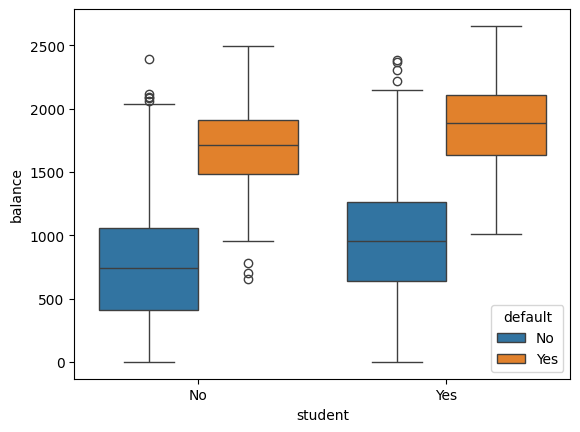

In [52]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

##### **Insight:**
1. The boxplot showing between balance or student.
2. The boxplot is not really showing any significant remark
3. Wether student or not, the defaulter status depending on the balance

# **Why not linear regression**
Though it is always possible to use numeric values for the categories of the response, there generally is no natural way to order and separate the values in a way that makes sense. Only in a two-category problem will the ordering make sense but even then linear regression will produce probability estimates outside of [0, 1].

In [53]:
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [54]:
# make column for Yes defaults
default['Yes'] = (default['default'] == 'Yes').astype(int)

In [55]:
default.head()

,default,student,balance,income,Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


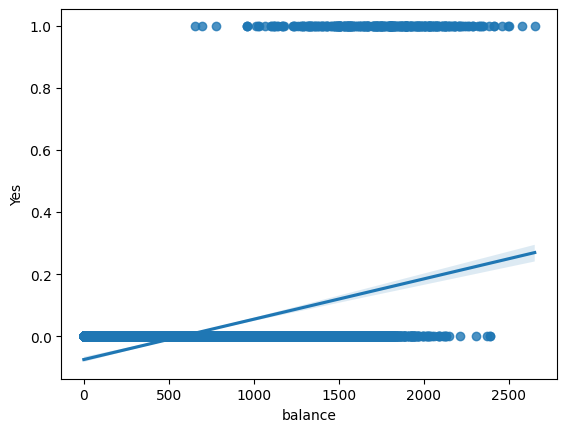

In [56]:
# linear regression model for default
# not ideal and could be made better by simply making all probabilites < 0 equal to 0
# and all probabilites > 1 equal to 1
sns.regplot(x='balance',y='Yes', data=default);

##### **Insight:**
1. From the plot we also can see data imbalance
2. Because No value is larger than Yes.


# **Estimating coefficients through Maximum Likelihood**
In linear regression, the model coefficients were found by minimizing the squared residuals. In logistic regression, we maximize the probabilities of all points by a method called maximum likelihood. Maximum likelihood multiplies the model probability for each observation together and chooses parameters that maximize this number. The log likelihood is actually used as numerical underflow will be a problem for must problems with a non-trivial amount of data.

**Explanation**
1. Goal: Both linear regression and logistic regression aim to find the best parameters (coefficients) for the model, but they do it in different ways.
2. Linear Regression: In linear regression, we find the best-fit line by minimizing the squared differences between the predicted values and the actual values. This method is called least squares.
3. Logistic Regression: In logistic regression, which is used for binary outcomes (like yes/no questions), we aim to maximize the probability of getting the actual observed outcomes.
4. Maximum Likelihood: This is the method used in logistic regression to estimate the best coefficients. It involves:


*   Probability Calculation: Calculate the probability that each observed outcome
occurs, based on the current model parameters.
*   Multiplication of Probabilities: Multiply all these probabilities together. The result is a single number that represents how likely it is to see the observed outcomes given the model parameters.
*   Maximization: Adjust the model parameters to maximize this likelihood number. The higher the number, the better the model fits the data.
*   List item

5. Log Likelihood: Instead of directly multiplying the probabilities, which can be computationally challenging especially with a large amount of data (due to very small numbers causing numerical issues), we use the logarithm of the probabilities. Adding these logarithms (log likelihood) is mathematically equivalent to multiplying the probabilities but is much easier to handle numerically.

In simple terms, in logistic regression, we're trying to tune our model parameters so that the observed outcomes (like whether someone clicked on an ad or not) are the most probable outcomes according to the model predictions. This tuning process is done by maximizing the likelihood of seeing the actual outcomes we have in our data.

In [16]:
# Think about doing a maximum likelihood example with 4 coin tosses and 3 heads.
# Start with .5 then choose .6 and see the differences

In [ ]:
#smf.logit: This function from the statsmodels.formula.api module is used to specify and fit a logistic regression model. logit stands for logistic regression.
#.fit(): This method fits the logistic regression model to the provided data according to the specified formula. It calculates the coefficients of the balance variable that maximize the likelihood of the observed outcomes in the Yes variable.

In [57]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [ ]:
#Overall, this output suggests that the logistic regression model was successfully fitted to the data,
#achieving a satisfactory convergence with a relatively low function value after 10 iterations.

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.4534
Time:                        01:41:40   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### **Insight:**


1.   Intercept (-10.6513): The intercept, or the bias term, in a logistic regression model tells us the log-odds of the outcome variable being 1 (in your case, perhaps the event Yes occurring) when all the predictor variables are zero. In practical terms, a very negative intercept like -10.6513 indicates that when balance is zero, the probability of Yes occurring is very low.

2.   balance (0.0055): This coefficient represents the change in the log-odds of the outcome variable being 1 for each one-unit increase in balance. A positive coefficient like 0.0055 suggests that as balance increases, the probability of Yes also increases. This means that higher balances are associated with a greater likelihood of the event Yes occurring.


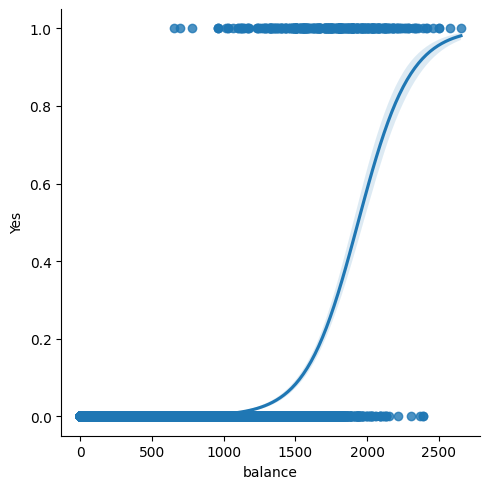

In [59]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='Yes', data=default, logistic=True);

In summary:


*   Use sns.regplot if you need a simple linear regression plot without the need for facets or conditioning on additional categorical variables.
*   Use sns.lmplot with logistic=True for plotting logistic regression, which is suitable for binary dependent variables and for more complex plotting needs including facets and categorization.





# **Scikit-learn for easier prediction**

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
# this actually uses regularization by default which will be covered in later chapters
lr = LogisticRegression()

In [63]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [64]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [65]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [66]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

# **Multiple Linear Regression**
more than 1 predictor

In [67]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.4619
Time:                        01:41:58   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### **Insight:**


1.   Intercept (-10.7495): The intercept term represents the log-odds of the outcome being 1 when all the other predictors (student[T.Yes] and balance) are zero. A highly negative intercept, like -10.7495, indicates that the baseline probability of the outcome occurring is very low when the other variables are at their reference level (i.e., when student is not 'Yes' and balance is 0).

2.   student[T.Yes] (-0.7149): This coefficient indicates the change in the log-odds of the outcome being 1 associated with the student variable being 'Yes', relative to the baseline category (probably 'No', if Yes and No are the categories). A negative coefficient (-0.7149) suggests that being a student (Yes) decreases the log-odds of the outcome compared to not being a student.

3.  balance (0.0057): This coefficient tells us the change in the log-odds of the outcome being 1 for each one-unit increase in balance. A positive coefficient (0.0057) means that as the balance increases, the likelihood of the outcome also increases.

In [69]:
#add new column (student_yes)
default['student_yes'] = (default['student'] == 'Yes').astype(int)

In [70]:
default

,default,student,balance,income,Yes,student_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [71]:
X = np.column_stack((np.ones(len(default)), default['balance'], default['student_yes']))

In [73]:
X

array([[1.00000000e+00, 7.29526495e+02, 0.00000000e+00],
       [1.00000000e+00, 8.17180407e+02, 1.00000000e+00],
       [1.00000000e+00, 1.07354916e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 8.45411989e+02, 0.00000000e+00],
       [1.00000000e+00, 1.56900905e+03, 0.00000000e+00],
       [1.00000000e+00, 2.00922183e+02, 1.00000000e+00]])

In [72]:
lr.fit(X, default['Yes'])

LogisticRegression()

In [74]:
lr.coef_

array([[-5.19067722,  0.00554579, -0.84302061]])

In [75]:
# predict 1000 dollar balance default
lr.predict_proba([[1, 2000, 1]]) # 99 percent chance no default

array([[0.5331531, 0.4668469]])

# **Simpsons paradox**

Simpson's Paradox shows why it's important to look at data from multiple angles and to consider the context and composition of groups when analyzing results. It warns us against making decisions based on aggregated data without examining subgroup dynamics, as these can hide or distort underlying trends.

In [76]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2024   Pseudo R-squ.:                0.004097
Time:                        01:42:27   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

##### **Insight:**

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

##**Linear Discriminant Analysis**

Linear Discriminant Analysis (LDA) is a statistical method used to help distinguish and classify objects, events, or values into specific groups or categories based on their features. It's particularly useful when you know the groups beforehand and you want to predict where new observations fit within those groups

**Application of LDA**:

**Classification**: Once LDA has determined the best line or plane, it can use this to classify new observations. If you have a new data point and you want to see which group it likely belongs to, you see where it falls relative to the line or plane that LDA has drawn.

**Dimensionality Reduction**: LDA can also be used to reduce the number of variables (features) you need to consider in your analysis, by focusing only on those that are effective in distinguishing between groups.

Example:
Imagine you are trying to distinguish between two types of plants based on their leaf sizes and shapes. LDA would analyze the sizes and shapes of leaves that are already known, find the best way to draw a line that separates these two types based on these features, and then use this line to identify the type of new plant samples based on their leaf characteristics.

In summary, LDA helps simplify complex classification problems by finding the straightest path to separate and understand different groups, making it easier to see where new observations fit.

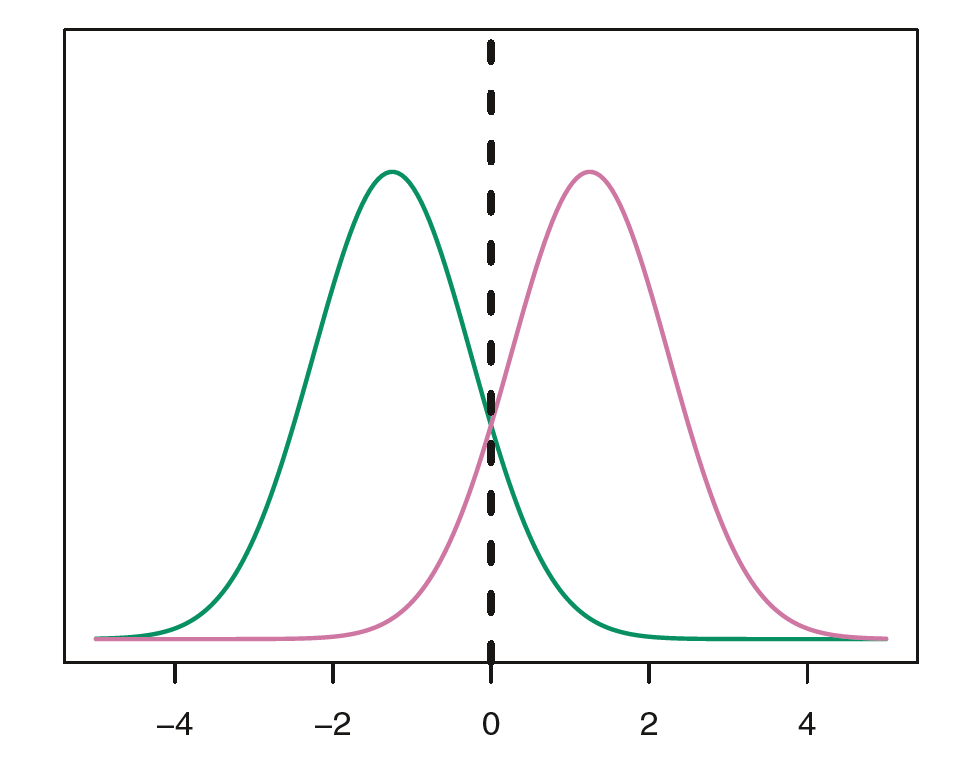

In [40]:
from IPython.display import Image
Image("/content/gdrive/MyDrive/STQD 6024 Machine Learning/p1.PNG", width =400)

**Graph Description:**


*   Two Distributions: There are two curves, each representing the probability distribution of a single predictor for two different classes (e.g., green for Class 1 and pink for Class 2). These could represent something like test scores for two groups.
*   Dotted Vertical Line: This line represents the decision boundary determined by LDA. It's the point that best separates the two classes based on their probability distributions.

**Key Points of LDA from the Graph:**


1.   Separation Point: The dotted line is placed where the overlap between the two distributions is minimized, optimizing the separation of the two classes. This is where LDA has calculated that the likelihood of misclassifying an observation from either class is lowest.
2.   Classification Rule: For a new observation (e.g., a new test score), where it falls relative to this line determines its predicted class:

*   If it's to the left of the line, it would be classified as belonging to the class represented by the green curve (Class 1).
*   If it's to the right, it would be classified as belonging to the class represented by the pink curve (Class 2).

3.  Effectiveness: The effectiveness of LDA here depends on how well-separated the two distributions are. If there is a lot of overlap, misclassifications are more likely. In your graph, although there is some overlap, there's a clear region where each class predominates.

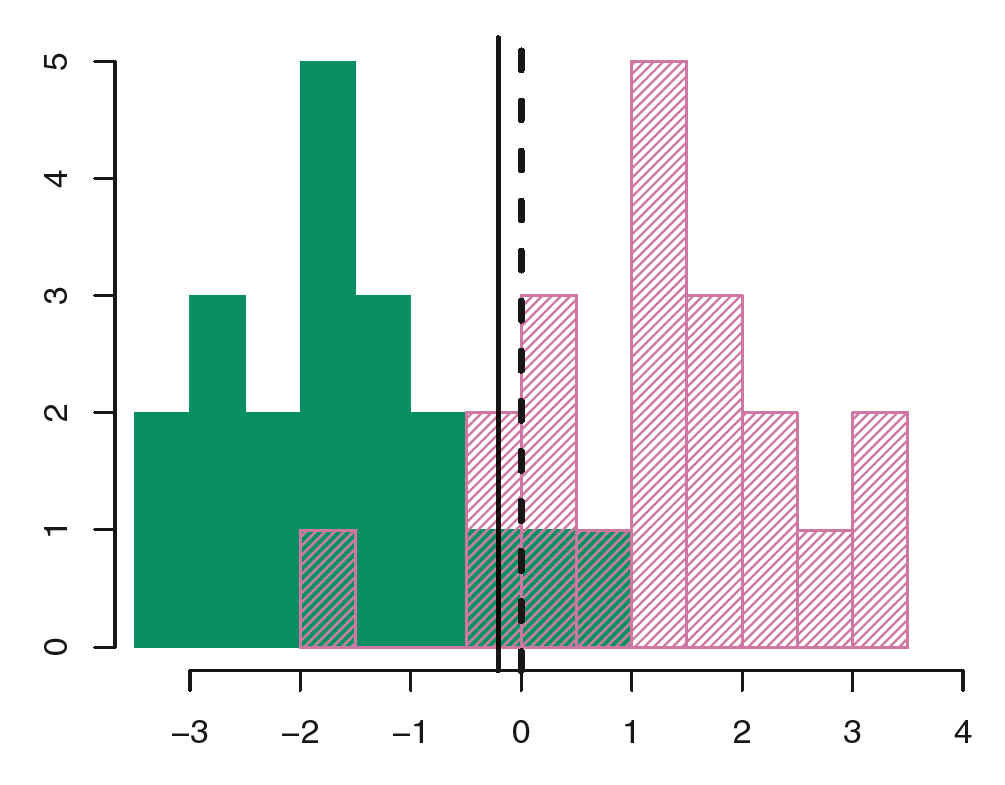

In [41]:
Image("/content/gdrive/MyDrive/STQD 6024 Machine Learning/p2.PNG", width =400)





*   20 observations were drawn from each of the two classes, and are shown as histograms.
*   Dashed vertical line - Bayes decision boundary

*   Solid vertical line - LDA decision boundary





In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y, lda.predict(X))

array([[3, 0],
       [0, 3]])

In [80]:
print(lda.predict([[-0.8, -1]]))

[1]


In [81]:
default

,default,student,balance,income,Yes,student_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [82]:
X=default[['student_yes', 'balance']].values
y=default['Yes'].values

In [83]:
X

array([[0.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [0.00000000e+00, 1.07354916e+03],
       ...,
       [0.00000000e+00, 8.45411989e+02],
       [0.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

In [84]:
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [85]:
confusion_matrix(y,lda.predict(X))

array([[9644,   23],
       [ 252,   81]])